#  Yolo v3 Training

## Darknet Preparation

### Daknet Download

In [1]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14662 (delta 1), reused 3 (delta 1), pack-reused 14657
Receiving objects: 100% (14662/14662), 13.24 MiB | 6.46 MiB/s, done.
Resolving deltas: 100% (9974/9974), done.


### Darknet Compilation

In [2]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building...")

!make &> build_log.txt

/content/darknet
Building...


## Model Preparation

### Model Download

In [3]:
# Original File : https://pjreddie.com/media/files/darknet53.conv.74
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

--2021-01-08 11:36:50--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2021-01-08 11:36:50--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3a9b23f599c848e13b9422daeb.dl.dropboxusercontent.com/cd/0/get/BGmMvxdghNkbBgt05Ym7GSioQIGOpYAEZSOSe3FfPYiGxDpDgME4OpqnzoO-FaXRuKsSCMekX-adN5xXERGJyxc6POSQVY0EbiLCoBx3dalDxiu0wf0AJExCHNETcXoboOA/file?dl=1# [following]
--2021-01-08 11:36:51--  https://uc3a9b23f599c848e13b9422daeb.dl.dropboxusercontent.com/cd/0/get/BGmMvxdghNkbBgt05Ym7GSioQIGOpYAEZSOSe3FfPYiGxDpDgME4OpqnzoO-FaXRuKsSCMekX-adN5xXERGJyxc6POS

### Training Configuration

The training configuration must account the fact that there are two possible classes (Mask and No-Mask). So the `class.name` file must contain those two names, while the `yolo-mask-setup.data` must contain the same information:
```
classes= 2
train  = data_train.txt
valid = data_test.txt
names = class.names
backup = backup/
```
The same number must be reported in the `yolov3-mask-train.cfg` and the `yolov3-mask-test.cfg`, and the `filters` parameters in the convolutional laysers has to be corrected accordingly (21).

Finally, given the increase of the numer of classes, the `max_batches` parametrs has be updated to 4000.

The complete training configurations are:
```
width=416
height=416
channels=3

momentum=0.9
decay=0.0005

angle=0
saturation = 1.5
exposure = 1.2
hue=.15

learning_rate=0.001
burn_in=200
max_batches=4000
policy=steps
steps=3250
scales=.1
```




In [11]:
!wget "https://www.dropbox.com/s/6aox4aexuf5lnie/OpenCV-II-Project-3-v3.zip?dl=0" -O config.zip
!unzip config.zip &> /dev/null

--2021-01-08 11:43:36--  https://www.dropbox.com/s/6aox4aexuf5lnie/OpenCV-II-Project-3.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/6aox4aexuf5lnie/OpenCV-II-Project-3.zip [following]
--2021-01-08 11:43:37--  https://www.dropbox.com/s/raw/6aox4aexuf5lnie/OpenCV-II-Project-3.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbcc59c0d59d822bbf54bcae715.dl.dropboxusercontent.com/cd/0/inline/BGlOMPyoyYWqD9v_6RNeZhcafqARfs1qJr-1kJonFfHmHlYe1_JXT6JZq8Fx704nBTuleE66rbx33sarC_XsUCrDqmR6it-8v8EkIfTsVNMQiHCrLla5LzRSJGZWRtu18Wo/file# [following]
--2021-01-08 11:43:37--  https://ucbcc59c0d59d822bbf54bcae715.dl.dropboxusercontent.com/cd/0/inline/BGlOMPyoyYWqD9v_6RNeZhcafqARfs1qJr-1kJonFfHmHlYe1_JXT6JZq8Fx704nBTuleE

## Data Preparation

### Data Download

In [12]:
%cd ..
!mkdir mask_dataset
%cd mask_dataset
!wget "https://www.dropbox.com/s/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip?dl=1" -O mask_dataset.zip
!unzip mask_dataset.zip &> /dev/null

/content
mkdir: cannot create directory ‘mask_dataset’: File exists
/content/mask_dataset
--2021-01-08 11:43:39--  https://www.dropbox.com/s/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip [following]
--2021-01-08 11:43:39--  https://www.dropbox.com/s/dl/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc69c6e5a9a0491b48b2779bdf07.dl.dropboxusercontent.com/cd/0/get/BGkZUVa3QdXL338_B91PJv_Q6nI9IhcVEgzCPZHuCOFM4jTi3ehzOQE3NT_Qp05wf_cHBJMGCGsqWW1zokYMEHPlCO2teOE-oygW_G9J7u1EXE5RQvFw_eSeMgIC3f3Nr3M/file?dl=1# [following]
--2021-01-08 11:43:40--  https://uc69c6e5a9a0491b48b2779bdf

### Data Pre-processing

In [13]:
%cd ../darknet

import random
import os
import subprocess
import sys

image_dir = "../mask_dataset"
f_val = open("data_test.txt", 'w')
f_train = open("data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg"):
        ind += 1
        
        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

/content/darknet


## Training

In [14]:
!./darknet detector train yolo-mask-setup.data yolov3-mask-train.cfg ./darknet53.conv.74 -dont_show -map 2> train_log.txt

Output streaming troncato alle ultime 5000 righe.
 416 x 416 
 try to allocate additional workspace_size = 52.43 MB 
 CUDA allocate done! 
Loaded: 0.086884 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 68.06 %, best = 75.73 % 
 3131: 0.631557, 0.766832 avg loss, 0.001000 rate, 3.779482 seconds, 200384 images, 1.247290 hours left
Loaded: 0.000047 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 68.06 %, best = 75.73 % 
 3132: 0.819696, 0.772119 avg loss, 0.001000 rate, 3.880277 seconds, 200448 images, 1.244150 hours left
Loaded: 0.000050 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 68.06 %, best = 75.73 % 
 3133: 1.396877, 0.834594 avg loss, 0.001000 rate, 4.268088 seconds, 200512 images, 1.241064 hours left
Loaded: 0.000043 seconds

 (next mAP calculation at 3200 iterations) 
 Last accuracy mAP@0.5 = 68.06 %, best = 75.73 % 
 3134: 0.510527, 0.802188 avg loss, 0.001000 rate, 3.980400 seconds, 

## Testing

In [19]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### (Optional) Download model weights

In [20]:
#!wget "https://www.dropbox.com/s/m5z1q1yf25bgz25/yolov3-mask-train_best.weights?dl=0" -O backup/yolov3-mask-train_best.weights

### Download of test images and videos

In [21]:
!wget "https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1" -O test-image1.jpg
!wget "https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1" -O test-image2.jpg
!wget "https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1" -O test-image3.jpg
!wget "https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1" -O test-image4.jpg

!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O test-video1.mp4
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O test-video2.mp4

--2021-01-08 17:57:21--  https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.18, 2620:100:6032:18::a27d:5212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/fxei8rit9v2n83s/test-image1.jpg [following]
--2021-01-08 17:57:21--  https://www.dropbox.com/s/dl/fxei8rit9v2n83s/test-image1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc285ea6c85a87980b4e495d307a.dl.dropboxusercontent.com/cd/0/get/BGoOk6k79V41dVYin0d9K3bP5mKxrlfEsHkxU0cA3HdXiypBSzOStpD2L0Sllz8-mnRiafpJDq1pgzySNhjTwvZdxNa8SH_ExAAZpAyYBpKs0rCUem21ZlOTIxvFBYY6Ers/file?dl=1# [following]
--2021-01-08 17:57:22--  https://uc285ea6c85a87980b4e495d307a.dl.dropboxusercontent.com/cd/0/get/BGoOk6k79V41dVYin0d9K3bP5mKxrlfEsHkxU0cA3HdXiypBSzOStpD2L0Sllz8-mnRiafpJDq1pgzySNhjTwvZdxNa8SH_Ex

### Result on test images

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

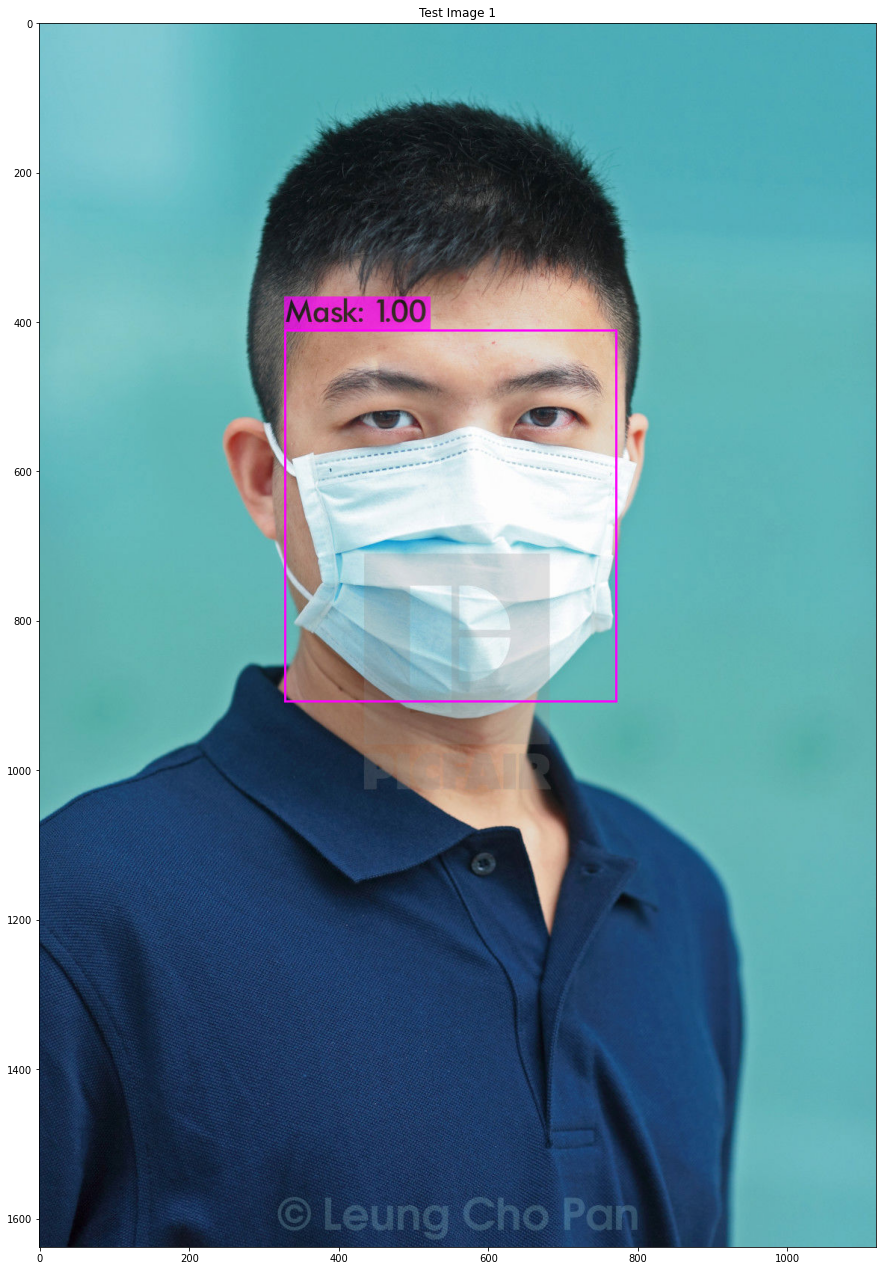

In [38]:
!./darknet detector test yolo-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-image1.jpg -thresh .6 -dont_show
!mv "./predictions.jpg" "./out-image1.jpg"
src = cv2.imread("out-image1.jpg",1)
plt.figure(figsize=[15, 30])
plt.imshow(src[:,:,::-1])
plt.title("Test Image 1")
plt.show()

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

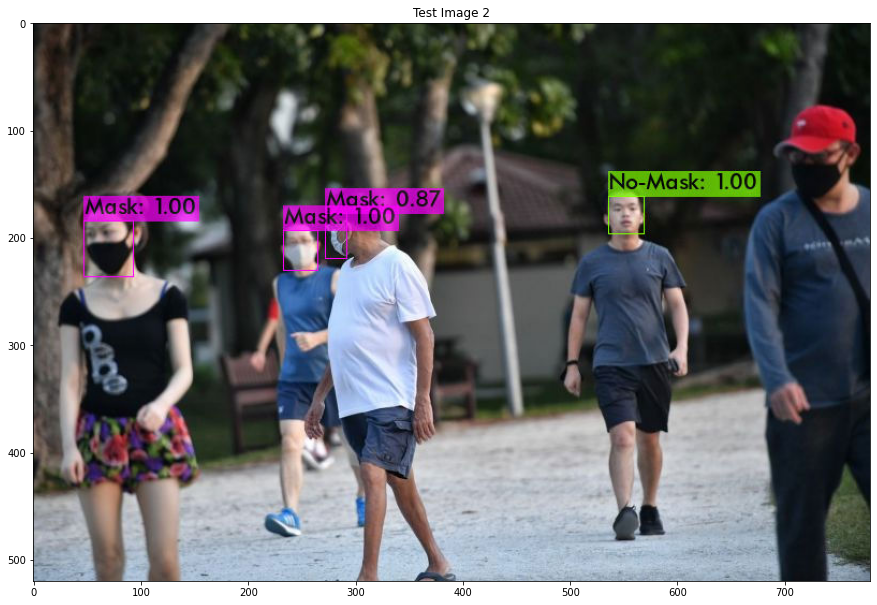

In [39]:
!./darknet detector test yolo-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-image2.jpg -thresh .6 -dont_show
!mv "./predictions.jpg" "./out-image2.jpg"
src = cv2.imread("out-image2.jpg",1)
plt.figure(figsize=[15, 30])
plt.imshow(src[:,:,::-1])
plt.title("Test Image 2")
plt.show()

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

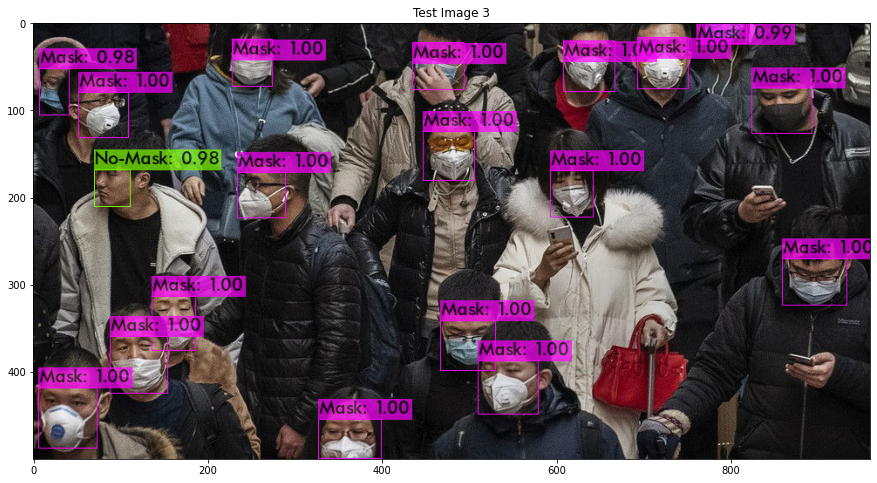

In [40]:
!./darknet detector test yolo-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-image3.jpg -thresh .6 -dont_show
!mv "./predictions.jpg" "./out-image3.jpg"
src = cv2.imread("out-image3.jpg",1)
plt.figure(figsize=[15, 30])
plt.imshow(src[:,:,::-1])
plt.title("Test Image 3")
plt.show()

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

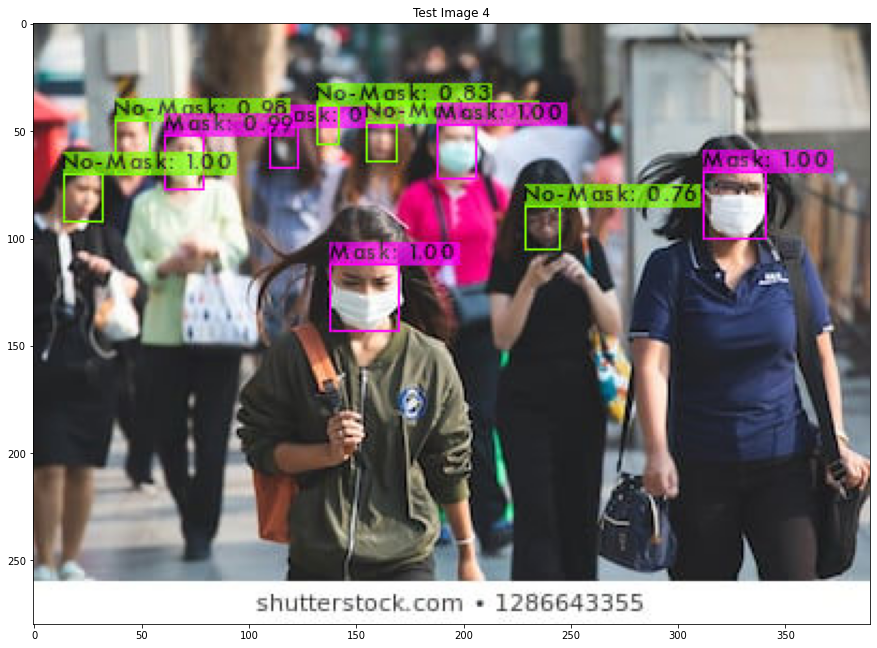

In [42]:
!./darknet detector test yolo-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-image4.jpg -thresh .6 -dont_show
!mv "./predictions.jpg" "./out-image4.jpg"
src = cv2.imread("out-image4.jpg",1)
plt.figure(figsize=[15, 30])
plt.imshow(src[:,:,::-1])
plt.title("Test Image 4")
plt.show()

### Results on videos

In [43]:
!./darknet detector demo yolo-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-video1.mp4 -thresh .6 -out_filename out-vid1.avi -dont_show
!./darknet detector demo yolo-mask-setup.data yolov3-mask-test.cfg backup/yolov3-mask-train_best.weights test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show

Output streaming troncato alle ultime 5000 righe.

No-Mask: 99% 
No-Mask: 99% 

FPS:45.6 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 100% 
No-Mask: 99% 
No-Mask: 88% 

FPS:46.3 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 97% 
No-Mask: 95% 
No-Mask: 74% 

FPS:45.5 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 91% 
No-Mask: 89% 
No-Mask: 87% 
No-Mask: 67% 
No-Mask: 63% 

FPS:44.6 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 97% 
No-Mask: 95% 
No-Mask: 85% 

FPS:43.8 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 98% 
No-Mask: 95% 
No-Mask: 82% 

FPS:42.6 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 97% 
No-Mask: 86% 
No-Mask: 68% 
No-Mask: 66% 

FPS:42.0 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 98% 
No-Mask: 97% 
No-Mask: 95% 
No-Mask: 95% 
No-Mask: 70% 
No-Mask: 69% 

FPS:40.7 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 99% 
No-Mask: 98% 
No-Mask: 93% 
No-Mask: 90% 

FPS:40.7 	 AVG_FPS:41.0

 cvWriteFrame 
Objects:

No-Mask: 99% 